<a href="https://colab.research.google.com/github/Anushamaria22/Air-Quality-Analysis-IOT/blob/main/Heart_Disease_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from torchvision.transforms import ToTensor
import pandas as pd
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/SaiPratyushaGantimahapatruni/Datasets/master/datasets_33180_43520_heart.csv')

#Dataset Description

Data always plays a major role in the prediction process. For developing this predictive model, the heart disease data available in the UCI machine learning repository were considered. The dataset consists of the below attributes.

S No Attribute Name Type of Attribute

1           Age                                            Real
2           Sex                                            Binary
3           Chest Pain Type                                Nominal
4           Resting  Blood Pressure                        Real
5           Cholesterol                                    Real
6           Fasting Blood Sugar                            Binary
7           Resting Electrocardiographic Results           Nominal
8           Maximum Heart Rate Achieved                    Real
9           Exercise Induced Angina                        Binary
10          Old peak                                       Real
11          Slope Of The Peak Exercise ST Segment          Ordered
12          Number Of Major Vessels                        Real
13          Thal                                           Nominal
14          Num                                            Real
age--->age in years

sex--->(1 = male; 0 = female)

cp--->Chest pain type

trestbps--->resting blood pressure (in mm Hg on admission to the hospital)

chol--->serum cholestoral in mg/dl

fbs--->(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg--->resting electrocardiographic results

thalch--->maximum heart rate achieved

exang--->exercise induced angina (1 = yes; 0 = no)

oldpeak--->ST depression induced by exercise relative to rest

slope--->Slope Of The Peak Exercise ST Segment

ca--->Number of major vessels

thal--->Thal

target--->heart disease (1=yes; 0=no)

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
num_rows=data.shape[0]
num_rows

303

In [6]:
num_cols=data.shape[1]
num_cols

14

In [7]:
input_cols=data.columns[:-1]
input_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [8]:
target_col=data.columns[-1:]
target_col

Index(['target'], dtype='object')

In [9]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

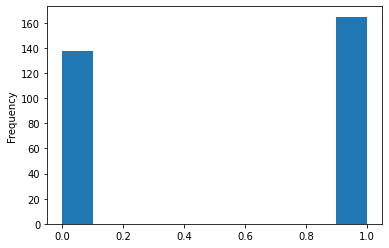

In [10]:
data.target.plot(kind="hist")

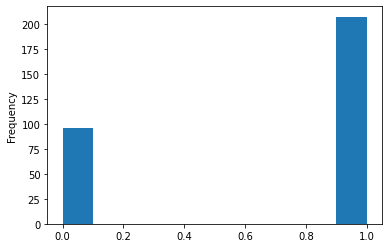

In [11]:
data.sex.plot(kind='hist')

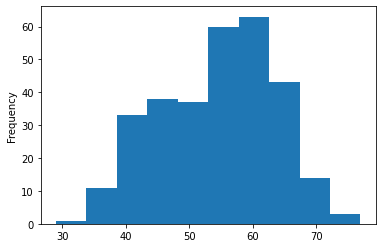

In [12]:
data.age.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


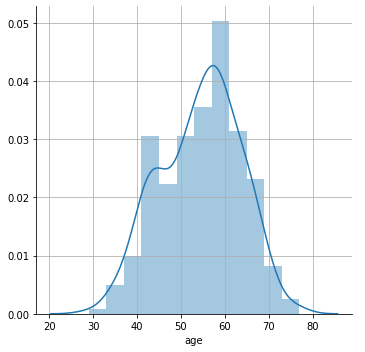

In [13]:
import seaborn as sns
sns.FacetGrid(data,height = 5)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


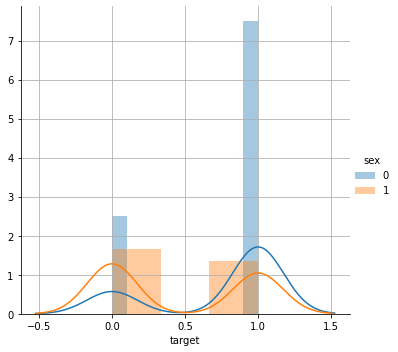

In [14]:
sns.FacetGrid(data,hue='sex',height = 5)\
 .map(sns.distplot,'target')\
 . add_legend();
plt.grid()
plt.show()

In [15]:
d=data[data.target==1]

In [16]:
d.sex.value_counts()

1    93
0    72
Name: sex, dtype: int64

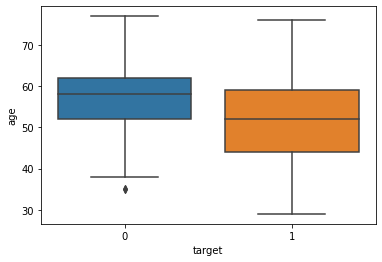

In [17]:
sns.boxplot(x='target',y='age',data=data)
plt.show()

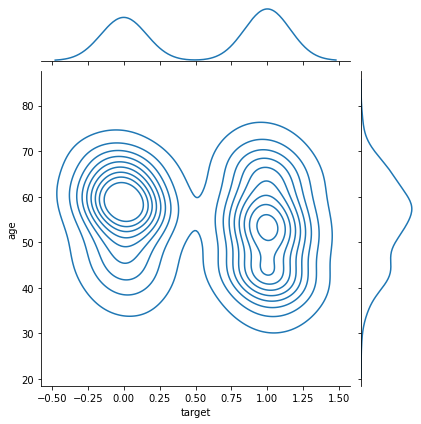

In [18]:
sns.jointplot(x = 'target', y = 'age', data = data, kind = 'kde')
plt.show()

In [19]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
   
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[target_col].to_numpy()
    return inputs_array, targets_array

In [20]:
inputs_array, targets_array = dataframe_to_arrays(data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
inputs = torch.from_numpy(np.array(inputs_array,dtype='float32'))

targets = torch.from_numpy(np.array(targets_array,dtype='float32'))

In [24]:
inputs.dtype

torch.float32

In [25]:
targets.dtype

torch.float32

In [26]:
from torch.utils.data import DataLoader, TensorDataset, random_split
dataset = TensorDataset(inputs, targets)

In [27]:
test_percent = 0.15
num_rows=len(inputs)
test_size = int(num_rows * test_percent)
train_size = num_rows - test_size


train_ds, test_ds = random_split(dataset,[train_size,test_size])

In [28]:
batch_size=1

In [29]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size)

In [30]:
for data, target in train_loader:
    print("inputs:", data)
    print("targets:", target)
    break

inputs: tensor([[ 49.,   1.,   2., 120., 188.,   0.,   1., 139.,   0.,   2.,   1.,   3.,
           3.]])
targets: tensor([[0.]])


In [31]:
input_size = len(input_cols)
output_size = len(target_col)

In [32]:
input_size,output_size

(13, 1)

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
len(train_loader)

258

In [35]:
class HeartModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)                
        
    def forward(self, xb):
        out = self.linear(xb)    
        out=F.sigmoid(out)                    
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)         
        # Calcuate loss
        loss = F.binary_cross_entropy(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.binary_cross_entropy(out, targets)                              
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [36]:
model=HeartModel()

In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0652,  0.0195, -0.2346, -0.0233, -0.2614, -0.1394, -0.1559, -0.1173,
          -0.2103, -0.0896, -0.0213,  0.1118, -0.2546]], requires_grad=True),
 Parameter containing:
 tensor([-0.2662], requires_grad=True)]

In [38]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [39]:
result = evaluate(model,test_loader) # Use the the evaluate function
print(result)

{'val_loss': 46.09092712402344}


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [40]:
epochs = 300
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [20], val_loss: 46.0909
Epoch [40], val_loss: 46.0909
Epoch [60], val_loss: 46.0909
Epoch [80], val_loss: 46.0909
Epoch [100], val_loss: 46.0909
Epoch [120], val_loss: 46.0909
Epoch [140], val_loss: 46.0909
Epoch [160], val_loss: 46.0909
Epoch [180], val_loss: 46.0909
Epoch [200], val_loss: 46.0909
Epoch [220], val_loss: 46.0909
Epoch [240], val_loss: 46.0909
Epoch [260], val_loss: 46.0909
Epoch [280], val_loss: 46.0909
Epoch [300], val_loss: 46.0909


The model has been trained with different batch sizes, epochs, loss functions and optimizers. But only the model that gave me the best results are shown here.

In [41]:
val_loss = evaluate(model,test_loader)
val_loss

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


{'val_loss': 46.09092712402344}

In [42]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)           # fill this
    prediction =predictions[0].detach()
    if(prediction>=0.5):
        prediction=np.array(1)
    else:
        prediction=np.array(0)
    prediction=np.array(prediction)
    prediction = torch.from_numpy(np.array(prediction,dtype='float32'))
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    return prediction,target
    

In [43]:
pred=[]
actual=[]
for i in range(len(test_ds)):
    input, target = test_ds[i]
    val,act=predict_single(input, target, model)
  
  
    pred.append(val)
    actual.append(act)

pred=np.array(pred)
pred = torch.from_numpy(np.array(pred,dtype='float32'))
  

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Input: tensor([ 64.,   0.,   0., 130., 303.,   0.,   1., 122.,   0.,   2.,   1.,   2.,
          2.])
Target: tensor([1.])
Prediction: tensor(0.)
Input: tensor([ 56.0000,   1.0000,   1.0000, 120.0000, 236.0000,   0.0000,   1.0000,
        178.0000,   0.0000,   0.8000,   2.0000,   0.0000,   2.0000])
Target: tensor([1.])
Prediction: tensor(0.)
Input: tensor([6.4000e+01, 0.0000e+00, 2.0000e+00, 1.4000e+02, 3.1300e+02, 0.0000e+00,
        1.0000e+00, 1.3300e+02, 0.0000e+00, 2.0000e-01, 2.0000e+00, 0.0000e+00,
        3.0000e+00])
Target: tensor([1.])
Prediction: tensor(0.)
Input: tensor([ 51.0000,   1.0000,   3.0000, 125.0000, 213.0000,   0.0000,   0.0000,
        125.0000,   1.0000,   1.4000,   2.0000,   1.0000,   2.0000])
Target: tensor([1.])
Prediction: tensor(0.)
Input: tensor([4.7000e+01, 1.0000e+00, 0.0000e+00, 1.1200e+02, 2.0400e+02, 0.0000e+00,
        1.0000e+00, 1.4300e+02, 0.0000e+00, 1.0000e-01, 2.0000e+00, 0.0000e+00,
        2.0000e+00])
Target: tensor([1.])
Prediction: tenso

In [45]:
count=0
total=len(test_ds)
for i in range(len(test_ds)):
    if(actual[i]==pred[i]):
      count+=1
count

22

In [1]:
print(f'Accuracy of the network on the {total} test data is {100*(count/total)}')

NameError: ignored